### Non-linear relationships with NNs

Neural networks are simply multiple layers of logistic regressions.  They are useful in uncovering non-linear relationships.  They are useful in cases where one parameter alone may not contain predictive power, however the value of one variable, based on if another variable is present.  The conditional probability.  https://stats.stackexchange.com/a/41290.

Let's take a practical example of two lightswitches and a light.  Where the output, or rather, the light being on depends on both switches.  





Notice figure 1.0 below.  We will denote the position of lightswitch 1 as $X_{1}$, the position of lighswitch 2 as $X_{2}$, and then whether or not the light is on by the output classifier, $Y$.

The light on if only 1 of the lights is switched on.  If they are both on, the effect is negated and the light turns off.  


##### Figure 1.0: Lightswitch example

$X_{1}$ | $X_{2}$ | $Y$
:--- | --- | ---
0   | 0   | 0
1   | 0   | 1
0   | 1   | 1
1   | 1   | 0


So what's the problem?  Why can't we describe this relationship using a logistic regression.  Well the issue is that these variables are not linearly correlated.  More specifically, the value of one variable doesn't give us any information about the output.  They are dependent on eachother.  Plotting $X_{1}$ against $X_{2}$ on a plane, will visually show us why this is the case.  Notice Plot 1.0 below.

It would be impossible to draw a linear decision boundary that correctly seperates the negative outputs from the positives.  As an example, I have drawn $X_{2} = X_{1} * 0.6 + 0.2$ But any way we slice the plane, we are isolating 1 correct and 1 incorrect training example.  This is the first hint that we need either a more complicated decision boundary, or a more powerful method.   Namely, Neural Networks!

Text(0,1.2,'Plot 1.0: X_1 against X_2')

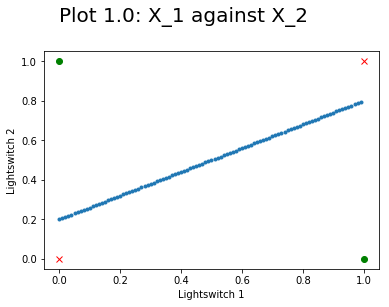

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot([0, 1], [1, 0], 'go')
plt.plot([0, 1], [0, 1], 'rx')
decision_boundary_xis = np.arange(0, 1, 0.01)
plt.plot(decision_boundary_xis, decision_boundary_xis * .6 + 0.2, '.')


plt.xlabel('Lightswitch 1')
plt.ylabel('Lightswitch 2')
plt.text(0,1.2, 'Plot 1.0: X_1 against X_2', fontsize=20)

With neural networks, we add layers of abstraction.  Layers of more logistic regressions, to apply more complicated relationships to the data.



In [18]:
import tensorflow as tf
import numpy as np

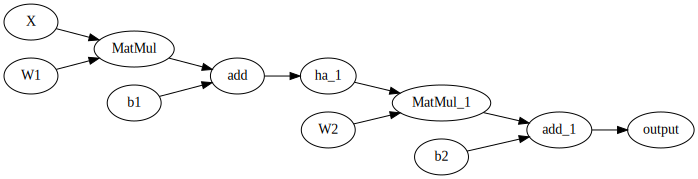

In [34]:
from graphviz import Digraph

def tf_to_dot(graph):
    dot = Digraph()
    dot.graph_attr['rankdir'] = 'LR' # graph goes from left to right.

    for n in g.as_graph_def().node:
        dot.node(n.name, label=n.name)

        for i in n.input:
            dot.edge(i, n.name)
            
    return dot

g = tf.Graph()

with g.as_default():
    
    X = tf.placeholder(tf.float32, name="X")
    
    W1 = tf.placeholder(tf.float32, name="W1")
    b1 = tf.placeholder(tf.float32, name="b1")

    a1 = tf.nn.sigmoid(tf.matmul(X, W1) + b1, name="ha_1") # first hidden activations.

    W2 = tf.placeholder(tf.float32, name="W2")
    b2 = tf.placeholder(tf.float32, name="b2")
    y_hat = tf.nn.sigmoid(tf.matmul(a1, W2) + b2, name="output")
           
tf_to_dot(g)

In the above tensorflow graph, I have drawn out the classifier portion.  An input X feeds through a first layer of logistic regressions.  After passing outputs through the sigmoid squasher function, the aforenamed hidden activations are passed through a second layer of logistic regressions to give us output of the prediction of if the light is on.  

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [29]:

# our inputs.
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

Y = np.array([
    0, 1, 1, 0
])

w1 = np.array([
    [1000, -1000],
    [-1000, 1000],
])
b1 = -500
# calculate the hidden activations for layer 1.  

theta_x = X.dot(w1)
z_1 = theta_x + b1
ha_1 = sigmoid(z_1)

# Begin Layer 2

w2 = np.array([1000, 1000])
b2 = -500

z_2 = ha_1.dot(w2) + b2
z_2
output = sigmoid(z_2)

np.around(output) # output predictions.

/home/niko/anaconda3/envs/ned/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([0., 1., 1., 0.])

Notice we are getting the same values as our Y, training array above.